# Simple Supervised Learning Model

## Predicting Energy Efficiency of Buildings. 

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

In [2]:
# Generating synthetic dataset for building features and energy efficiency ratings
# Using np.random.uniform() to develop a normally distributed dataset. 
np.random.seed(0)
data_size = 500
data = {
    'WallArea': np.random.randint(200, 400, data_size),
    'RoofArea': np.random.randint(100, 200, data_size),
    'OverallHeight': np.random.uniform(3, 10, data_size),
    'GlazingArea': np.random.uniform(0, 1, data_size),
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Energy efficiency rating
}
df = pd.DataFrame(data)

In [3]:
# Data preprocessing and separating predictor variables and outcome variable for train test split
X = df.drop('EnergyEfficiency', axis=1)
y = df['EnergyEfficiency']

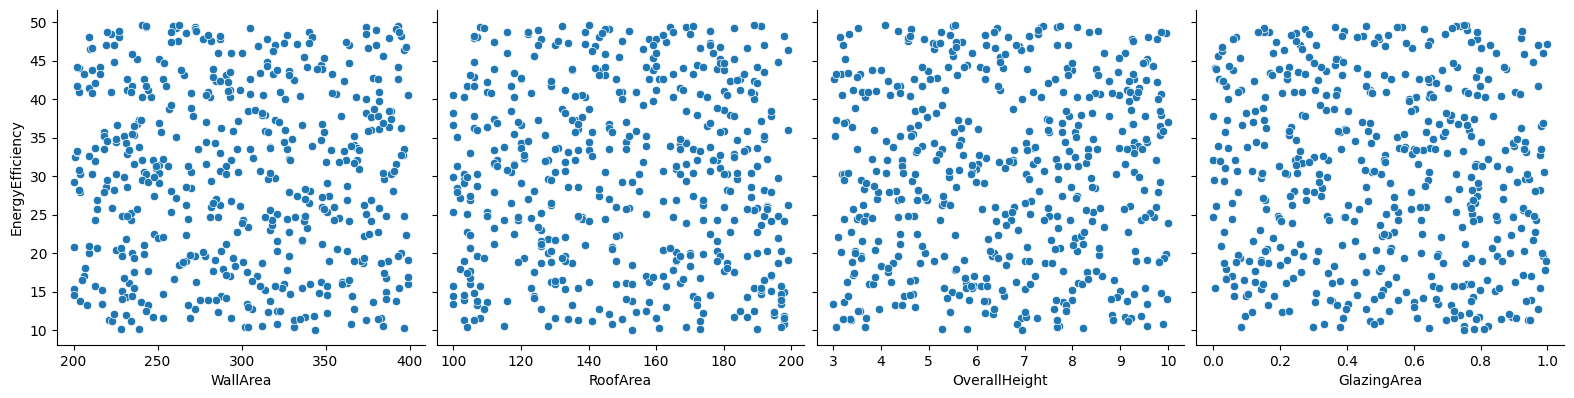

In [ ]:
# Visualize the relationships between features and the target variable (Energy Efficiency)
# This is possible especially all the data types are int or floats. 
sns.pairplot(
    df, 
    x_vars=['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea'], 
    y_vars='EnergyEfficiency', height=4, aspect=1, kind='scatter'
    )
plt.show()

# We can see that there isn't a defining relationship between the X features and 'EnergyEfficiency'. 

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Training a Random Forest model. This is a simple model, no hyperparameters are specified. 
# Using RandomForestRegressor() since our output variable is a continuous value.
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predicting outcome and evaluating model's accuracy. 
# Since our model is using a regression algorithm, the evaluation metric is mean squared error (mse). 
# MSE calculated the the average of deviations from the expected data point and squares that value. It is squared to remove error directionality. 
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
# Our MSE is 146. To explain this in simpler terms. The average deviation from expected outputs which is also known as average error is, about 12. 
# This means that on average, our model predicts the energy efficiency by either 12% higher, or 12% lower. 

Mean Squared Error: 146.02051889440582


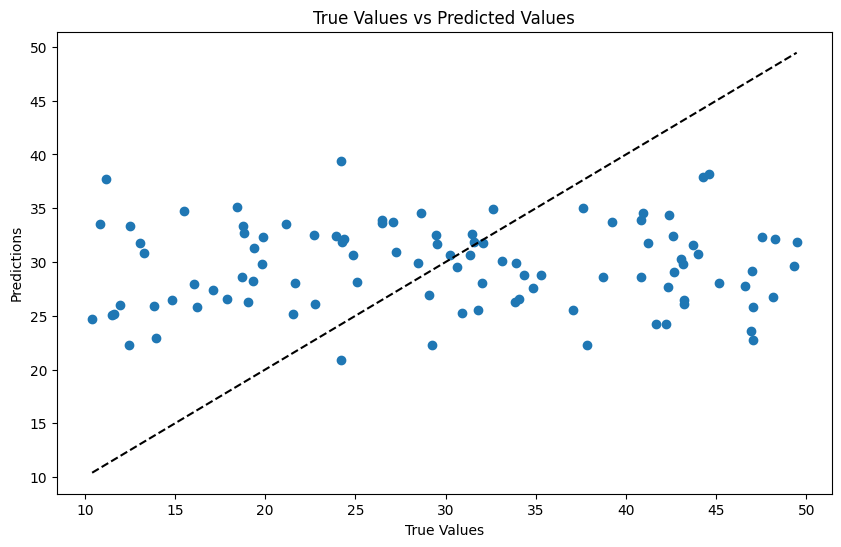

In [8]:
# Plotting the True values vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

# Simple Unsupervised Learning Model

## Vehicle Clustering

In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

In [10]:
# Generating synthetic dataset for vehicles
np.random.seed(0)
data_size = 300
data = {
    'Weight': np.random.randint(1000, 3000, data_size),
    'EngineSize': np.random.uniform(1.0, 4.0, data_size),
    'Horsepower': np.random.randint(50, 300, data_size)
}
df = pd.DataFrame(data)

In [11]:
# No labels are needed for unsupervised learning. Hence, there is no need to specify y label. 
X = df

In [12]:
# Performing KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

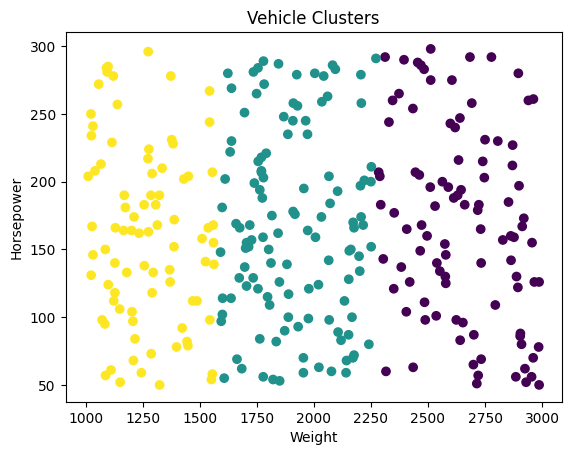

In [13]:
# Plotting the clusters
plt.scatter(df['Weight'], df['Horsepower'], c=kmeans.labels_)
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Vehicle Clusters')
plt.show()

In [ ]:
# We can then build a table to associate each X feature with their label.
df['Class'] = kmeans.labels_
df.head(10)
# Depending on the robustness of our clustering model, we can use this dataset to train a supervised model. 

,Weight,EngineSize,Horsepower,Class
0,1684,3.544025,62,1
1,1559,3.421957,168,2
2,2653,2.707302,96,0
3,2216,2.221550,168,1
4,1835,1.207501,82,1
5,1763,3.092286,84,1
6,2731,2.360628,165,0
7,2383,3.166167,137,0
8,2033,3.599147,174,1
9,2747,3.926565,203,0
